A code for check the code for the trained trajectory cVAE model

In [22]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from models.vae import CVAE
from torch.utils.data import DataLoader
from utils.data_loader import DataLoader as num_dataset
from models.dmp import CanonicalSystem, SingleDMP
import os

check the custom dataset

In [23]:
# create dataset for training and testing
cs = CanonicalSystem(dt=0.01, ax=1)
dmp = SingleDMP(n_bfs=50, cs=cs, run_time=1.0, dt=0.01)
train_dataset = num_dataset(run_time=1, dmp=dmp, dt=0.01, dof=2)
train_dataset.load_data('./data/test_paths.npz')

print(os.getcwd())
cs = CanonicalSystem(dt=0.01, ax=1)
dmp = SingleDMP(n_bfs=50, cs=cs, run_time=1.0, dt=0.01)

print("train dataset size: ", len(train_dataset))

# create dataloader for training and testing
train_iter = DataLoader(train_dataset, batch_size=32, shuffle=True)
print(os.getcwd())

/home/binzhao/pb_ml/VAE_DMP
train dataset size:  10000
/home/binzhao/pb_ml/VAE_DMP


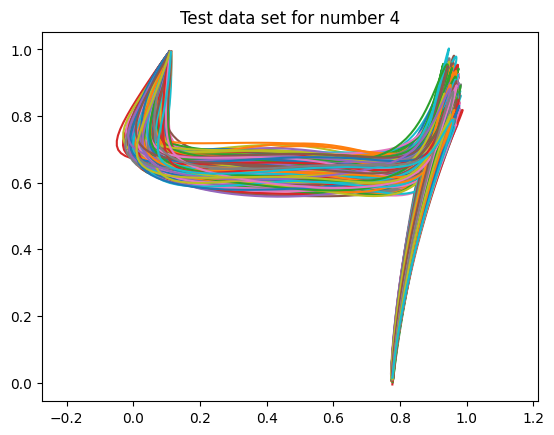

In [24]:
number = 2
for x, y in train_iter:
    # get index of y equal to number
    index = torch.where(y == number)[0]
    plt.plot(x[index, 0, :].T, x[index, 1, :].T)
plt.title("Test data set for number " + str(number))
plt.axis('equal')
plt.show()

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
shape = (2, 100)
vae_net =  CVAE(shape=shape, nclass=10, nhid=8, ncond=8)
vae_net.to(device)

CVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv1d(2, 16, kernel_size=(5,), stride=(2,))
      (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv1d(16, 32, kernel_size=(5,), stride=(2,))
      (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv1d(32, 64, kernel_size=(3,), stride=(2,))
      (8): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv1d(64, 64, kernel_size=(3,), stride=(2,))
      (11): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
        (mlp): Seque

In [26]:
checkpoint = torch.load("./models/cVAE.pt", map_location = device)
vae_net.load_state_dict(checkpoint["net"])
vae_net.to(device)
vae_net.eval()

CVAE(
  (encoder): Encoder(
    (encode): Sequential(
      (0): Conv1d(2, 16, kernel_size=(5,), stride=(2,))
      (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv1d(16, 32, kernel_size=(5,), stride=(2,))
      (4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv1d(32, 64, kernel_size=(3,), stride=(2,))
      (8): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv1d(64, 64, kernel_size=(3,), stride=(2,))
      (11): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (14): Flatten()
      (15): MLP(
        (mlp): Seque

check the generated trajectory

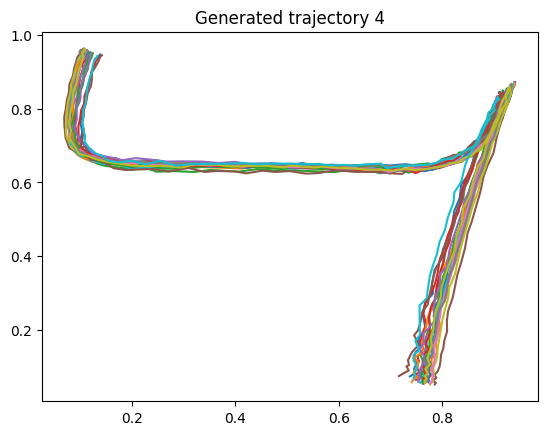

In [38]:
number = 4
for i in range(20):
    with torch.no_grad():
        x = vae_net.generate(number)           
    plt.plot(x[0, 0, :].cpu().numpy(), x[0, 1, :].cpu().numpy())
plt.title("Generated trajectory " + str(number))
#plt.axis('equal')
plt.show()
